## Import Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


## Loading Data

In [ ]:
df=pd.read_csv('/content/covid_19_clean_complete.csv')
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


## Explore and Clean

In [ ]:
df.shape

(49068, 10)

In [ ]:
df.nunique() 

Province/State       78
Country/Region      187
Lat                 260
Long                261
Date                188
Confirmed         10861
Deaths             3640
Recovered          7609
Active             8641
WHO Region            6
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


After looking in info of data we noticed that:
- We have a many null values in column 'Province/State', so let's drop it.
- 'Date' column is object! we should convert it into datetime


In [ ]:
df.drop(columns ='Province/State', inplace = True)
df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


we don't need the duplicated dates, so we creat a new dataframe with a unique dates

In [ ]:
df_uni=df.groupby(['Date'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()
df_uni

<ipython-input-32-5c764a682b4d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_uni=df.groupby(['Date'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()


,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010
...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006
184,2020-07-24,15791645,639650,8939705,6212290
185,2020-07-25,16047190,644517,9158743,6243930
186,2020-07-26,16251796,648621,9293464,6309711


In [ ]:
df_uni.isnull().sum()

Date         0
Confirmed    0
Deaths       0
Recovered    0
Active       0
dtype: int64

## Apply Prophet

Let's Apply Prophet, you can read more about it and how to use in this link: https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/

In [ ]:
from prophet import Prophet
pro = Prophet()

In Prophet: 
- The DataFrame must have a specific format. The first column must have the name ‘ds‘ and contain the date-times. The second column must have the name ‘y‘ and contain the observations.

In [ ]:
df_uni.rename(columns={'Date':'ds','Confirmed':'y'}, inplace = True)
df_uni

,ds,y,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010
...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006
184,2020-07-24,15791645,639650,8939705,6212290
185,2020-07-25,16047190,644517,9158743,6243930
186,2020-07-26,16251796,648621,9293464,6309711


In [ ]:
model=pro.fit(df_uni)
model.seasonalities

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

- now we will do forecasting so, to do this we need some Future Days: https://www.rdocumentation.org/packages/prophet/versions/1.0/topics/make_future_dataframe

In [ ]:
future_days=model.make_future_dataframe(periods=30,freq='D')
future_days.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [ ]:
pred=model.predict(future_days)

pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-1.062204e+04,-1.231267e+05,8.192240e+04,-1.062204e+04,-1.062204e+04,-11022.919838,-11022.919838,-11022.919838,-11022.919838,-11022.919838,-11022.919838,0.0,0.0,0.0,-2.164495e+04
1,2020-01-23,-7.870816e+03,-1.195550e+05,9.636343e+04,-7.870816e+03,-7.870816e+03,-1082.195992,-1082.195992,-1082.195992,-1082.195992,-1082.195992,-1082.195992,0.0,0.0,0.0,-8.953012e+03
2,2020-01-24,-5.119598e+03,-9.828399e+04,1.125955e+05,-5.119598e+03,-5.119598e+03,10096.194723,10096.194723,10096.194723,10096.194723,10096.194723,10096.194723,0.0,0.0,0.0,4.976597e+03
3,2020-01-25,-2.368379e+03,-1.015607e+05,1.130078e+05,-2.368379e+03,-2.368379e+03,13721.169479,13721.169479,13721.169479,13721.169479,13721.169479,13721.169479,0.0,0.0,0.0,1.135279e+04
4,2020-01-26,3.828396e+02,-9.285879e+04,1.198946e+05,3.828396e+02,3.828396e+02,7245.350392,7245.350392,7245.350392,7245.350392,7245.350392,7245.350392,0.0,0.0,0.0,7.628190e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2020-08-22,2.143675e+07,2.104124e+07,2.183670e+07,2.105316e+07,2.180139e+07,13721.169479,13721.169479,13721.169479,13721.169479,13721.169479,13721.169479,0.0,0.0,0.0,2.145047e+07
214,2020-08-23,2.164074e+07,2.122978e+07,2.203681e+07,2.123671e+07,2.202341e+07,7245.350392,7245.350392,7245.350392,7245.350392,7245.350392,7245.350392,0.0,0.0,0.0,2.164799e+07
215,2020-08-24,2.184474e+07,2.138624e+07,2.226368e+07,2.141685e+07,2.224168e+07,-2121.811953,-2121.811953,-2121.811953,-2121.811953,-2121.811953,-2121.811953,0.0,0.0,0.0,2.184261e+07
216,2020-08-25,2.204873e+07,2.155725e+07,2.249242e+07,2.159502e+07,2.247549e+07,-16835.786812,-16835.786812,-16835.786812,-16835.786812,-16835.786812,-16835.786812,0.0,0.0,0.0,2.203189e+07


## Visualization the prediction

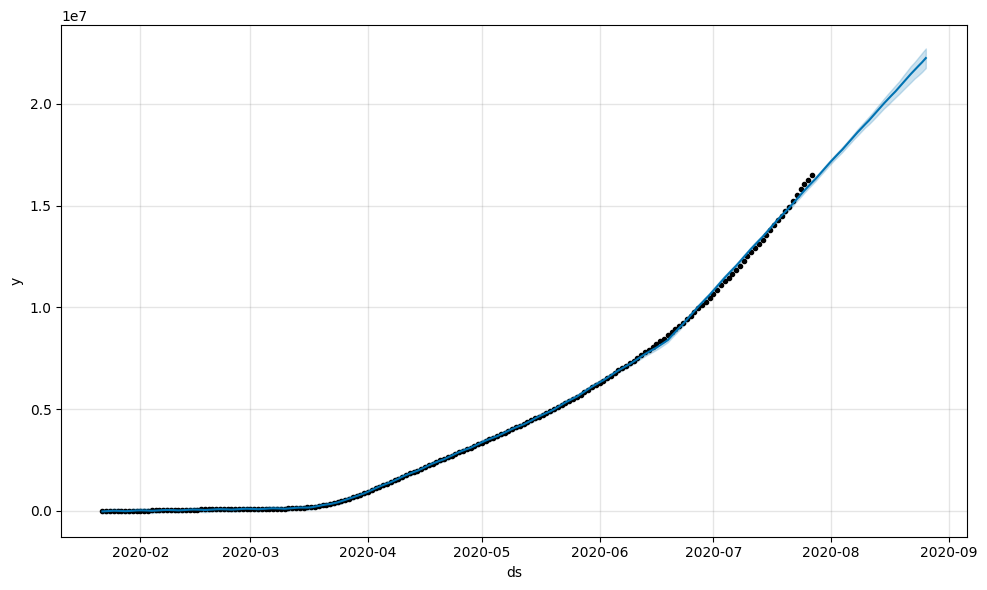

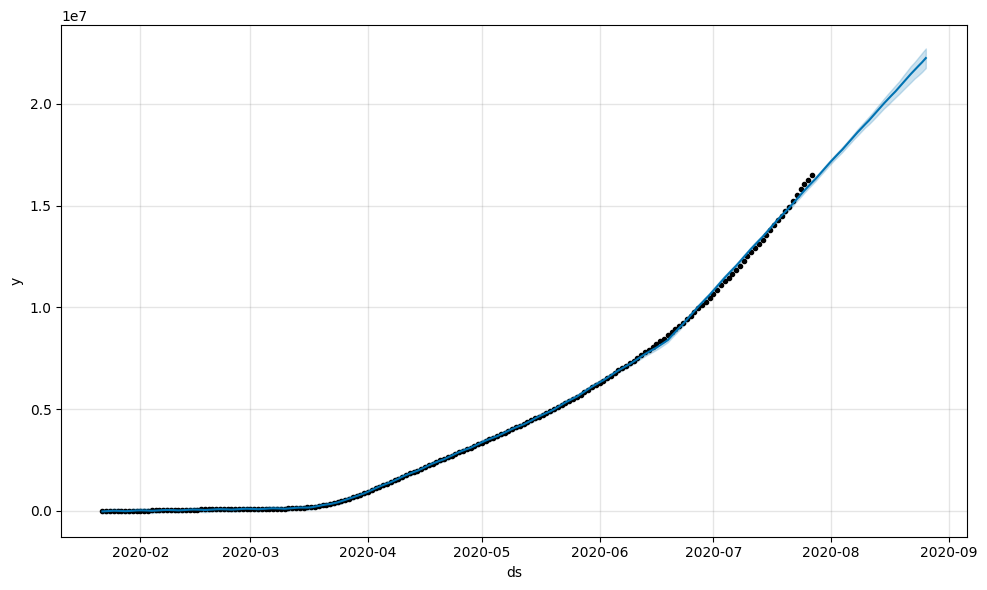

In [ ]:
model.plot(pred)

- A dark blue light over here which represent the predicted values, whereas the black dots are exactly my actual data.
- Range in above is  my future data.

### Let's visualize Each Components[Trends,Weekly]

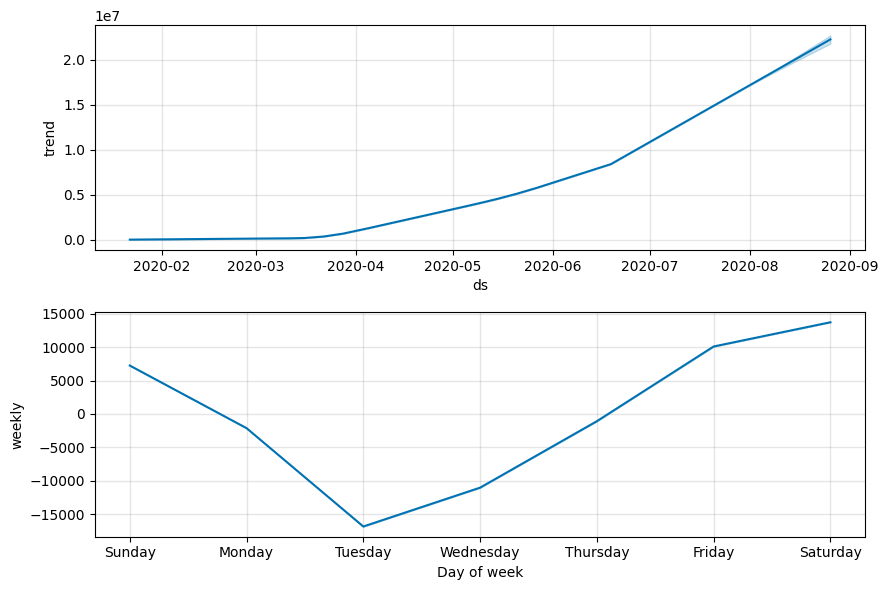

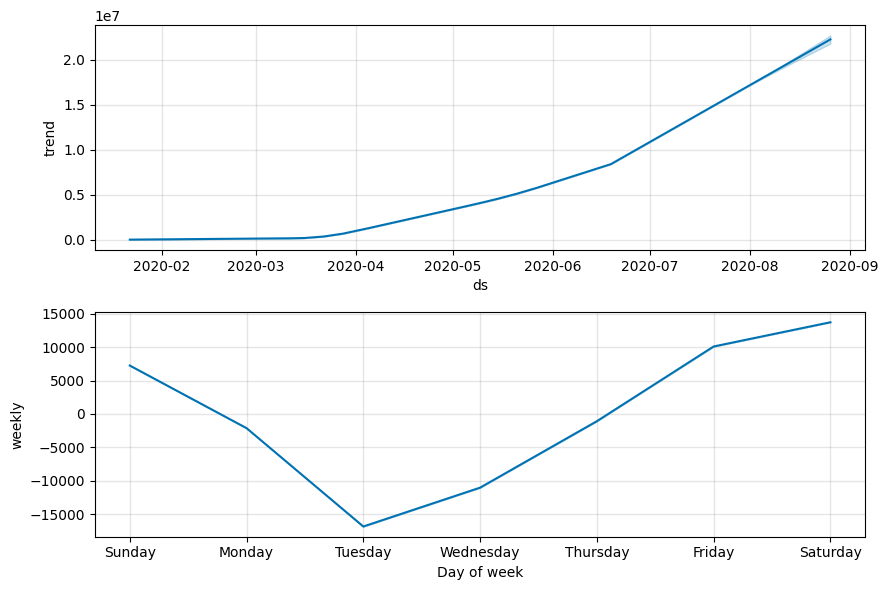

In [ ]:
model.plot_components(pred)

Making 5 forecasts with cutoffs between 2020-04-28 00:00:00 and 2020-06-27 00:00:00

In [ ]:
from prophet.diagnostics import cross_validation
cv=cross_validation(model ,horizon='30 days',period='15 days',initial='90 days')


INFO:prophet:Making 5 forecasts with cutoffs between 2020-04-28 00:00:00 and 2020-06-27 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
cv


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-29,3.201065e+06,3.195944e+06,3.206359e+06,3185195,2020-04-28
1,2020-04-30,3.285434e+06,3.279186e+06,3.291488e+06,3268876,2020-04-28
2,2020-05-01,3.369641e+06,3.360986e+06,3.377414e+06,3355922,2020-04-28
3,2020-05-02,3.450903e+06,3.438955e+06,3.461146e+06,3437608,2020-04-28
4,2020-05-03,3.530367e+06,3.514133e+06,3.545849e+06,3515244,2020-04-28
...,...,...,...,...,...,...
145,2020-07-23,1.315232e+07,1.288650e+07,1.343274e+07,15510481,2020-06-27
146,2020-07-24,1.329181e+07,1.300503e+07,1.359497e+07,15791645,2020-06-27
147,2020-07-25,1.342814e+07,1.311730e+07,1.375818e+07,16047190,2020-06-27
148,2020-07-26,1.354685e+07,1.322498e+07,1.388552e+07,16251796,2020-06-27


## Metrics

We compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE), Mean Absolute Percentage Error(MAPE).

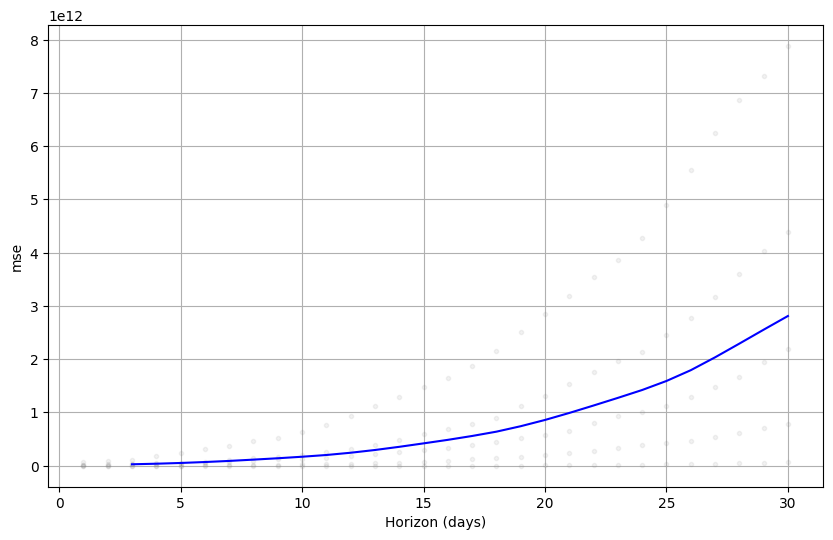

In [ ]:
from prophet.plot import plot_cross_validation_metric
df_plot = plot_cross_validation_metric(cv,metric='mse')

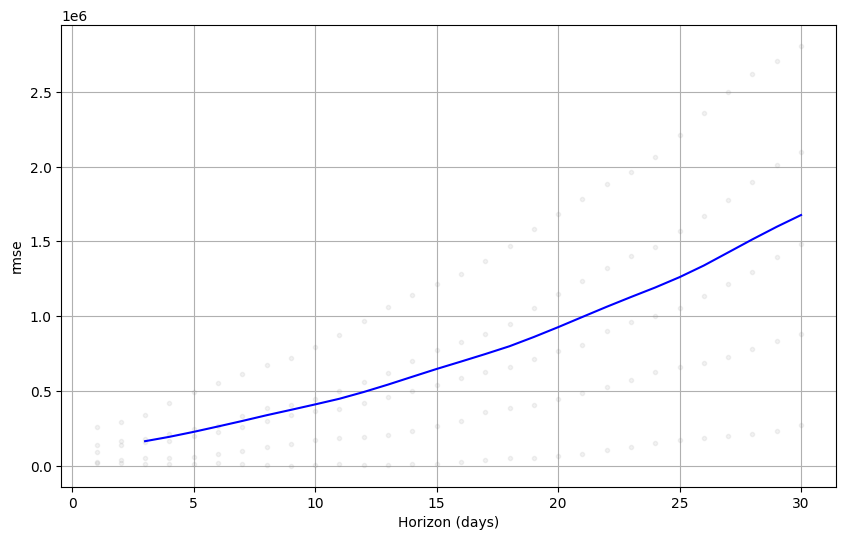

In [ ]:
df_plot=plot_cross_validation_metric(cv,metric='rmse')

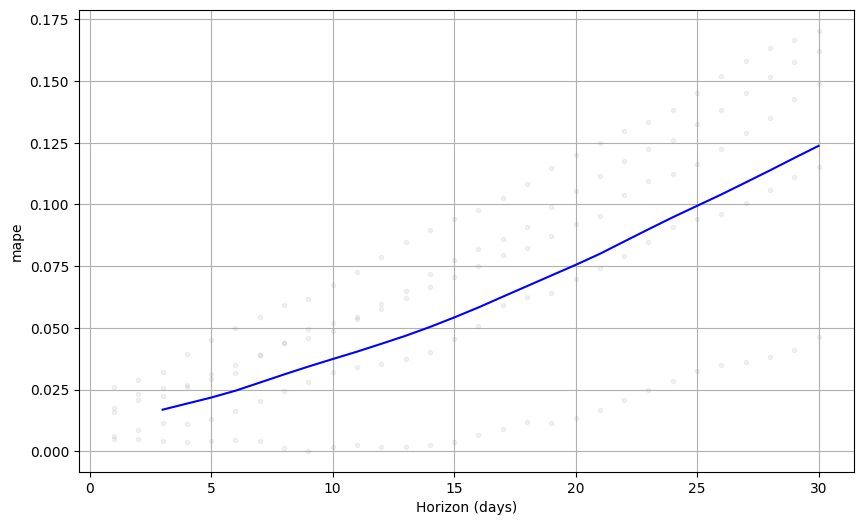

In [ ]:
df_plot=plot_cross_validation_metric(cv,metric='mape')